### weight: 열 단위의 All failed SSA

dutmap: 첫 번째 열만 All failed SSA, p=0.5

weight: 열 단위 (neighbors라면 weight 1로 부여)

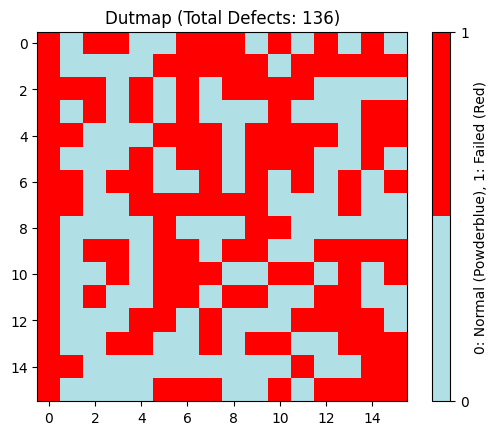

전체 불량 개수: 136


C:\Users\s\AppData\Local\Temp\ipykernel_37592\1394605708.py:43: UserWarning: The weights matrix is not fully connected: 
 There are 241 disconnected components.
 There are 240 islands with ids: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194

{0: [16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240],
 16: [0, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240],
 32: [0, 16, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240],
 48: [0, 16, 32, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240],
 64: [0, 16, 32, 48, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240],
 80: [0, 16, 32, 48, 64, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240],
 96: [0, 16, 32, 48, 64, 80, 112, 128, 144, 160, 176, 192, 208, 224, 240],
 112: [0, 16, 32, 48, 64, 80, 96, 128, 144, 160, 176, 192, 208, 224, 240],
 128: [0, 16, 32, 48, 64, 80, 96, 112, 144, 160, 176, 192, 208, 224, 240],
 144: [0, 16, 32, 48, 64, 80, 96, 112, 128, 160, 176, 192, 208, 224, 240],
 160: [0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 176, 192, 208, 224, 240],
 176: [0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 192, 208, 224, 240],
 192: [0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 208, 224, 240],
 208: [0, 16, 32, 48, 64,

In [8]:
import numpy as np 
from libpysal.weights import W 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 

def dutmap_allfailedssa_col(p, c, size): 
    dutmap = np.random.choice([0, 1], size=(size, size), p=[1-p, p]) 
    dutmap[:, c] = 1 
    return dutmap 

def dutmap_visualization(dutmap): 
    total_defects = np.sum(dutmap) 
    cmap = ListedColormap(["Powderblue", "Red"]) 
    plt.imshow(dutmap, cmap=cmap, interpolation='nearest') 
    plt.title(f"Dutmap (Total Defects: {total_defects})") 
    plt.colorbar(label='0: Normal (Powderblue), 1: Failed (Red)', ticks=[0, 1]) 
    plt.show() 

    print(f"전체 불량 개수: {total_defects}") 


def weight_allfailedssa_columns(dutmap):
    size = dutmap.shape[0]
    neighbors = {}
    weights = {}

    for col in range(size):
        if np.all(dutmap[:, col] == 1): 
            col_start = col
            col_end = size * size + col 

            for i in range(col_start, col_end, size):
                neighbors[i] = []
                weights[i] = []
                for j in range(col_start, col_end, size):
                    if i != j: 
                        neighbors[i].append(j)
                        weights[i].append(1)
        else:
            for i in range(col, size * size, size):
                neighbors[i] = []
                weights[i] = []
    parameterw = W(neighbors, weights)
    return parameterw


dutmap=dutmap_allfailedssa_col(p=0.5, c=0, size=16)
dutmap_visualization(dutmap)
parameterw=weight_allfailedssa_columns(dutmap)
parameterw.neighbors


### Results

0,16,32,...240 cell 들이 첫 번째 열 위의 cell 들이다.

그들에 대해서만 서로 자기 자신을 제외하고 neighbors 가 된다.